In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

In [31]:
# Step 1. Load dataset
df = pd.read_excel('Supplemental Processed Data Set.xlsx', sheet_name='S Table 1', skiprows=1)
df

,haplogroup,number of haplotypes,haplotype,total frequency,sampleID,population,frequency
0,C2b1a1a,4.0,"[19.0, 14.0, 22.0, 31.0, 22.0, 10.0, 17.0, 16....",1.0,HLM100,Hulunbuir[Mongolian],1.0
1,NaN,NaN,"[19.0, 14.0, 22.0, 30.0, 22.0, 10.0, 18.0, 17....",1.0,HHM158,Hohhot[Mongolian],1.0
2,NaN,NaN,"[18.0, 14.0, 21.0, 31.0, 24.0, 10.0, 17.0, 16....",1.0,ODM030,Ordos[Mongolian],1.0
3,NaN,NaN,"[19.0, 14.0, 22.0, 30.0, 20.0, 10.0, 18.0, 17....",1.0,HLM178,Hulunbuir[Mongolian],1.0
4,O2a2b1a1a1a4a1,6.0,"[18.0, 12.0, 20.0, 29.0, 19.0, 9.0, 18.0, 14.0...",1.0,HHM088,Hohhot[Mongolian],1.0
...,...,...,...,...,...,...,...
4059,NaN,NaN,"[20.0, 12.0, 20.0, 28.0, 21.0, 10.0, 15.0, 15....",1.0,HaiN153(Han),Han,1.0
4060,NaN,NaN,"[18.0, 12.0, 21.0, 28.0, 21.0, 10.0, 17.0, 15....",1.0,GD-16(Han),Han,1.0
4061,NaN,NaN,"[19.0, 12.0, 21.0, 28.0, 21.0, 10.0, 18.0, 16....",1.0,JX-82(Han),Han,1.0
4062,NaN,NaN,"[16.0, 14.0, 21.0, 29.0, 22.0, 11.0, 16.0, 15....",1.0,HaiN139(Han),Han,1.0


In [32]:
# Step 2. Fill NaN values
df = df.ffill()
df

,haplogroup,number of haplotypes,haplotype,total frequency,sampleID,population,frequency
0,C2b1a1a,4.0,"[19.0, 14.0, 22.0, 31.0, 22.0, 10.0, 17.0, 16....",1.0,HLM100,Hulunbuir[Mongolian],1.0
1,C2b1a1a,4.0,"[19.0, 14.0, 22.0, 30.0, 22.0, 10.0, 18.0, 17....",1.0,HHM158,Hohhot[Mongolian],1.0
2,C2b1a1a,4.0,"[18.0, 14.0, 21.0, 31.0, 24.0, 10.0, 17.0, 16....",1.0,ODM030,Ordos[Mongolian],1.0
3,C2b1a1a,4.0,"[19.0, 14.0, 22.0, 30.0, 20.0, 10.0, 18.0, 17....",1.0,HLM178,Hulunbuir[Mongolian],1.0
4,O2a2b1a1a1a4a1,6.0,"[18.0, 12.0, 20.0, 29.0, 19.0, 9.0, 18.0, 14.0...",1.0,HHM088,Hohhot[Mongolian],1.0
...,...,...,...,...,...,...,...
4059,O2a1c1a1a1,14.0,"[20.0, 12.0, 20.0, 28.0, 21.0, 10.0, 15.0, 15....",1.0,HaiN153(Han),Han,1.0
4060,O2a1c1a1a1,14.0,"[18.0, 12.0, 21.0, 28.0, 21.0, 10.0, 17.0, 15....",1.0,GD-16(Han),Han,1.0
4061,O2a1c1a1a1,14.0,"[19.0, 12.0, 21.0, 28.0, 21.0, 10.0, 18.0, 16....",1.0,JX-82(Han),Han,1.0
4062,O2a1c1a1a1,14.0,"[16.0, 14.0, 21.0, 29.0, 22.0, 11.0, 16.0, 15....",1.0,HaiN139(Han),Han,1.0


In [33]:
# Step 3. Split haplotype into separate columns
df = pd.concat([df, df['haplotype'].str.replace('[', '').str.replace(']', '').str.split(',', expand=True)], axis=1)
column_names = {0: "DYS576",
 1: "DYS389 I",
 2: "DYS635",
 3: "DYS389 II",
 4: "DYS627",
 5: "DYS460",
 6: "DYS458",
 7: "DYS19",
 8: "Y-GATA-H4",
 9: "DYS448",
10: "DYS391",
11: "DYS456",
12: "DYS390",
13: "DYS438",
14: "DYS392",
15: "DYS518",
16: "DYS570",
17: "DYS437",
18: "DYS385a",
19: "DYS385b",
20: "DYS449",
21: "DYS393",
22: "DYS439",
23: "DYS481",
24: "DYS576a",
25: "DYS576b",
26: "DYS533"
}

df = df.rename(columns=column_names)
df = df.drop(columns=['haplotype'])
df

,haplogroup,number of haplotypes,total frequency,sampleID,population,frequency,DYS576,DYS389 I,DYS635,DYS389 II,...,DYS437,DYS385a,DYS385b,DYS449,DYS393,DYS439,DYS481,DYS576a,DYS576b,DYS533
0,C2b1a1a,4.0,1.0,HLM100,Hulunbuir[Mongolian],1.0,19.0,14.0,22.0,31.0,...,14.0,11.0,19.0,30.0,14.0,12.0,24.0,36.0,39.0,12.0
1,C2b1a1a,4.0,1.0,HHM158,Hohhot[Mongolian],1.0,19.0,14.0,22.0,30.0,...,14.0,11.0,17.0,30.0,14.0,14.0,24.0,39.0,39.0,12.0
2,C2b1a1a,4.0,1.0,ODM030,Ordos[Mongolian],1.0,18.0,14.0,21.0,31.0,...,14.0,11.0,19.0,30.0,14.0,12.0,23.0,37.0,38.0,12.0
3,C2b1a1a,4.0,1.0,HLM178,Hulunbuir[Mongolian],1.0,19.0,14.0,22.0,30.0,...,14.0,11.0,17.0,30.0,14.0,14.0,24.0,39.0,39.0,12.0
4,O2a2b1a1a1a4a1,6.0,1.0,HHM088,Hohhot[Mongolian],1.0,18.0,12.0,20.0,29.0,...,16.0,14.0,18.0,32.0,11.0,13.0,23.0,35.0,37.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,O2a1c1a1a1,14.0,1.0,HaiN153(Han),Han,1.0,20.0,12.0,20.0,28.0,...,14.0,13.0,13.0,31.0,13.0,11.0,25.0,37.0,40.0,11.0
4060,O2a1c1a1a1,14.0,1.0,GD-16(Han),Han,1.0,18.0,12.0,21.0,28.0,...,14.0,12.0,19.0,31.0,12.0,12.0,28.0,36.0,38.0,11.0
4061,O2a1c1a1a1,14.0,1.0,JX-82(Han),Han,1.0,19.0,12.0,21.0,28.0,...,14.0,12.0,19.0,33.0,12.0,12.0,26.0,36.0,39.0,11.0
4062,O2a1c1a1a1,14.0,1.0,HaiN139(Han),Han,1.0,16.0,14.0,21.0,29.0,...,14.0,12.0,18.0,29.0,14.0,12.0,23.0,37.0,39.0,11.0


### Try with KNN Model

In [ ]:
# Scratch: Try loading using KNN with haplogroup as the target variable and haplotypes as the features
# Create the knn model
X = df.iloc[:, 6:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [35]:
# Create knn predictions
y_test_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_test_pred))

Test set predictions:
 ['N1a1a1a1a3a' 'O2a2b1a2a1a3b2' 'O1b1a2a' ... 'O1b1a1a1a1b' 'O1a1a1a1a1a1'
 'O2a2b1a1a1']


In [36]:
# Check knn model accuracy
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)*100)+ "%")

Test set score: 54.92%


In [37]:
# Try Monte Carlo Cross Validation to find best value for k 
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
 
for seedN in range(1, 21, 1):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seedN
    )
 
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 51, 1)  # try n_neighbors from 1 to 50
 
    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
 
        training_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))
 
    lahat_training[seedN] = training_accuracy
    lahat_test[seedN] = test_accuracy

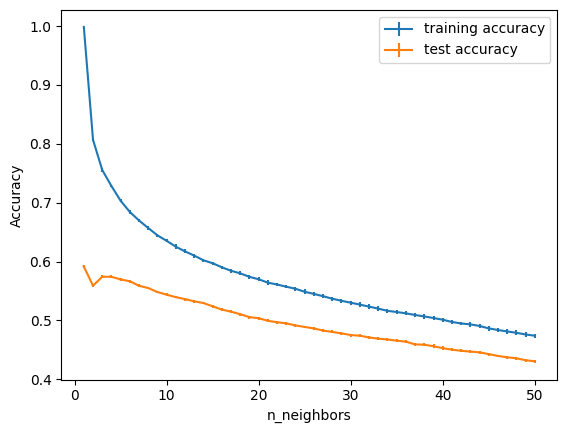

In [38]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [39]:
print("Best test set mean accuracy: {:.2f}%".format(lahat_test.mean(axis = 1).max() * 100))
print("For k = {}".format(lahat_test.mean(axis = 1).argmax() + 1))

Best test set mean accuracy: 59.16%
For k = 1


### Try with Random Forest